In [1]:
import numpy as np
import glob
import os  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image, ImageFile

import keras
from keras import initializers
from keras.models import Sequential
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from sklearn.preprocessing import label_binarize

from keras import models
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import BatchNormalization

from keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta, Nadam

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
path, dirs, files = next(os.walk(r"C:\Users\Tony\Desktop\Summer\rice\data"))
dirs

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

In [3]:
class_label = ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

In [4]:
i = 0

X_data = []
Y_data = []

for labels in class_label:
    files = glob.glob (r"C:\\Users\\Tony\\Desktop\\Summer\\rice\\data\\" + str(labels) + "/*.jpg")
    
    for myFile in files:
        img = Image.open(myFile)
        img = img.resize((128,128), Image.ANTIALIAS) # resizes image without ratio
        img = np.array(img)
        X_data.append (img)
        Y_data.append (i)
        
    i += 1

Total Number of Samples:  3355
Number of Samples per Class:
BrownSpot : 523
Healthy : 1488
Hispa : 565
LeafBlast : 779


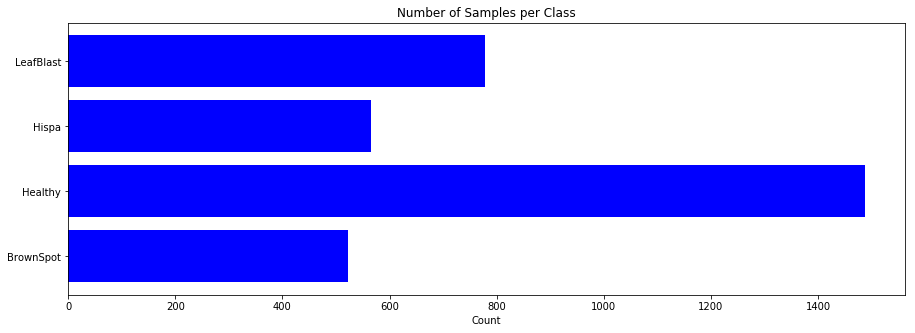

In [5]:
X = np.array(X_data)
Y = np.array(Y_data)
y_cat = to_categorical(Y_data, len(class_label))
# Print shapes to see if they are correct
# print(X.shape)
# print(Y.shape)

number_classes = [0,0,0,0]

for i in range(len(Y)):
    if (Y[i] == 0):
        number_classes[0] += 1
    elif (Y[i] == 1):
        number_classes[1] += 1
    elif (Y[i] == 2):
        number_classes[2] += 1
    elif (Y[i] == 3):
        number_classes[3] += 1

print("Total Number of Samples: ", len(X))
print("Number of Samples per Class:")  

for i in range(len(class_label)):
     print(class_label[i], ":", number_classes[i])

objects = class_label
y_pos = np.arange(len(objects))
samples = number_classes

plt.figure(figsize=[15,5])
plt.barh(y_pos, samples, align='center', color='b')
plt.xlabel('Count')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class')

plt.show()

In [6]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y_cat, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.2)

X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Number of Samples Train:  2348
Number of Samples Validation:  805
Number of Samples Test:  202


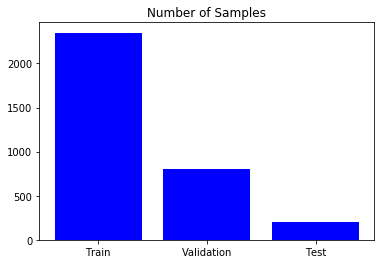

In [7]:
objects = ('Train', 'Validation', 'Test')
y_pos = np.arange(len(objects))
samples = []

samples.append(len(X_train))
samples.append(len(X_val))
samples.append(len(X_test))

print("Number of Samples Train: ", samples[0]) 
print("Number of Samples Validation: ", samples[1]) 
print("Number of Samples Test: ", samples[2]) 

plt.bar(y_pos, samples, align='center', color='b')
plt.xticks(y_pos, objects)
plt.title('Number of Samples')

plt.show()

Samples for Training set:
BrownSpot : 380
Healthy : 1054
Hispa : 373
LeafBlast : 541


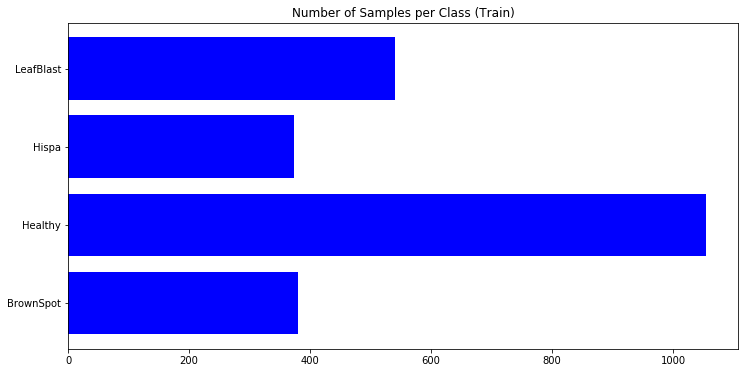

Samples for Validation set:
BrownSpot : 119
Healthy : 346
Hispa : 151
LeafBlast : 189


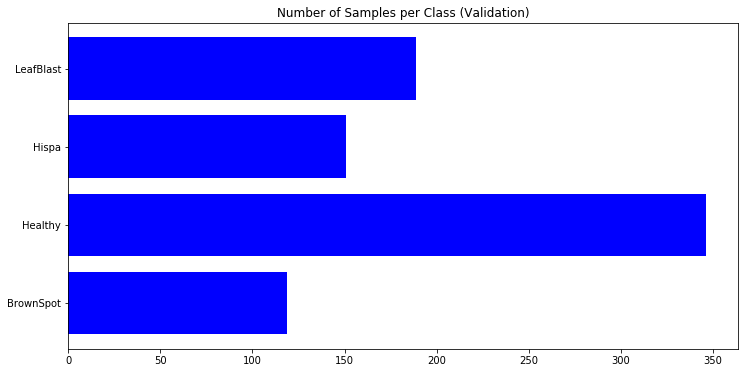

Samples for Testing set:
BrownSpot : 24
Healthy : 88
Hispa : 41
LeafBlast : 49


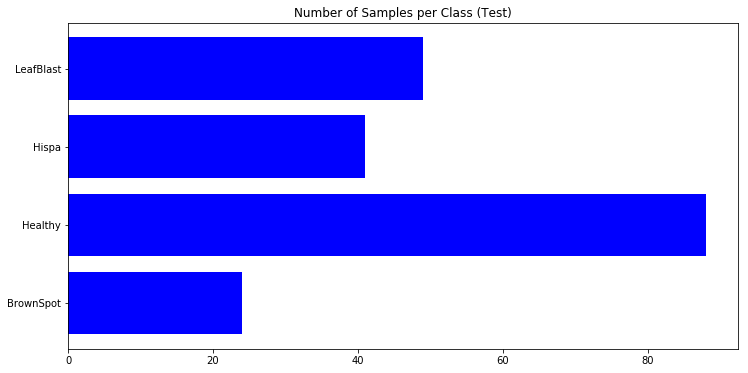

In [8]:
split_classes_train = [0,0,0,0]
split_classes_val = [0,0,0,0]
split_classes_test = [0,0,0,0]

for i in range(len(y_train)):
    for j in range(len(class_label)):
            if (y_train[i][j] == 1):
                split_classes_train[j] += 1
                
for i in range(len(y_val)):
    for j in range(len(class_label)):
            if (y_val[i][j] == 1):
                split_classes_val[j] += 1
                
for i in range(len(y_test)):
    for j in range(len(class_label)):
            if (y_test[i][j] == 1):
                split_classes_test[j] += 1
                
objects = class_label
y_pos = np.arange(len(objects))

print("Samples for Training set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_train[i])

samples_train = split_classes_train
samples_val = split_classes_val
samples_test = split_classes_test

#Train Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_train, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class (Train)')
plt.show()

print("Samples for Validation set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_val[i])

#Validation Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_val, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class (Validation)')
plt.show()

print("Samples for Testing set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_test[i])

#Test Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_test, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class (Test)')
plt.show()

In [9]:
validation_datagen = ImageDataGenerator(width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,)

test_datagen = ImageDataGenerator()

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,

        )

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train.reshape(X_train.shape[0], -1), y_train)
X_val_res, y_val_res = sm.fit_sample(X_val.reshape(X_val.shape[0], -1), y_val)

X_train_res = X_train_res.reshape(X_train_res.shape[0], 128, 128, 3)
X_val_res = X_val_res.reshape(X_val_res.shape[0], 128, 128, 3)

In [11]:
train_datagen.fit(X_train_res)
validation_datagen.fit(X_val_res)
test_datagen.fit(X_test)

train_generator = train_datagen.flow(X_train_res, y_train_res, batch_size=32)
validation_generator = validation_datagen.flow(X_val_res, y_val_res, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

Samples for Training set:
BrownSpot : 1054
Healthy : 1054
Hispa : 1054
LeafBlast : 1054


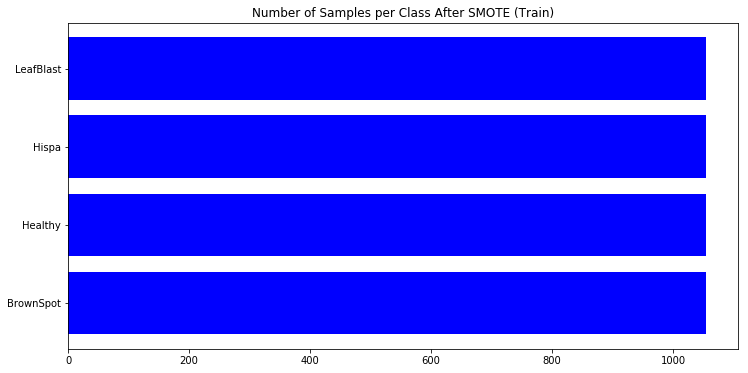

Samples for Validation set:
BrownSpot : 346
Healthy : 346
Hispa : 346
LeafBlast : 346


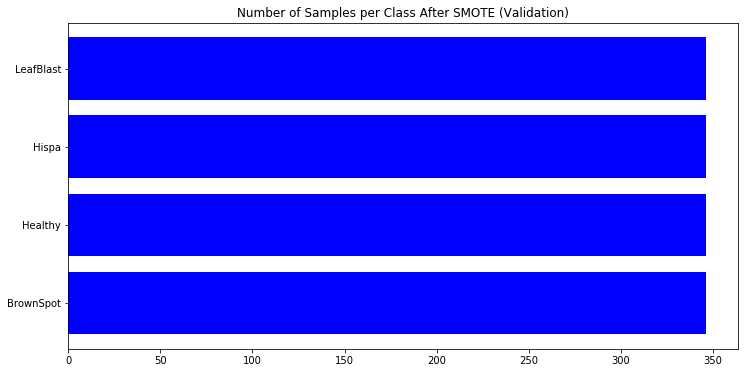

In [12]:
split_classes_train = [0,0,0,0]
split_classes_val = [0,0,0,0]
split_classes_test = [0,0,0,0]

for i in range(len(y_train_res)):
    for j in range(len(class_label)):
            if (y_train_res[i][j] == 1):
                split_classes_train[j] += 1
                
for i in range(len(y_val_res)):
    for j in range(len(class_label)):
            if (y_val_res[i][j] == 1):
                split_classes_val[j] += 1
                
objects = class_label
y_pos = np.arange(len(objects))

print("Samples for Training set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_train[i])

samples_train = split_classes_train
samples_val = split_classes_val
samples_test = split_classes_test

#Train Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_train, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class After SMOTE (Train)')
plt.show()

print("Samples for Validation set:")  
for i in range(len(class_label)):
     print(class_label[i], ":", split_classes_val[i])

#Validation Samples
plt.figure(figsize=[12,6])
plt.barh(y_pos, samples_val, align='center', color='b')
plt.yticks(y_pos, objects)
plt.title('Number of Samples per Class After SMOTE (Validation)')
plt.show()

In [13]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch >= 44:
        lr *= 1e-1
    elif epoch >= 29:
        lr *= 1e-1
    elif epoch >= 14:
        lr *= 1e-1
        
    print('Learning rate: ', lr)
    return lr

In [14]:
weight_decay = 0.0005

def block(x, width, stride, dropout):
    o1 = layers.BatchNormalization(axis=-1, 
                                   momentum=0.1, 
                                   epsilon=1e-5,  
                                   gamma_initializer='uniform')(x)
    o1 = layers.Activation('relu')(o1)
    y = layers.Conv2D(width,
                       kernel_size=(3, 3),
                       strides=(stride, stride),
                       padding='same',
                       kernel_initializer='glorot_uniform',
                       kernel_regularizer=keras.regularizers.l2(weight_decay),
                       use_bias=False)(o1)
    o2 = layers.BatchNormalization(axis=-1,
                            momentum=0.1,
                            epsilon=1e-5,
                            gamma_initializer='uniform')(y)
    if dropout > 0:
        o2 = layers.Dropout(dropout)(o2)
    o2 = layers.Activation('relu')(o2)
    z = layers.Conv2D(width,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      padding='same',
                      kernel_initializer='glorot_uniform',
                      kernel_regularizer=keras.regularizers.l2(weight_decay),
                      use_bias=False)(o2)
    if z.shape[-1] != x.shape[-1]:
        side_conv = layers.Conv2D(width,
                                  kernel_size=(3, 3),
                                  strides=(stride, stride),
                                  padding='same',
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=keras.regularizers.l2(weight_decay),
                                  use_bias=False)(o1)
        x = layers.Add()([z, side_conv])
    else:
        x = layers.Add()([z, x])

    return x

def group(x, n, width, stride, dropout):
    for i in range(n):
        x = block(x, width, stride if i ==0 else 1, dropout)
    return x

def wrn(input_shape, depth, width, num_classes, dropout):
    assert (depth - 4) % 6 == 0, 'depth should be 6n+4'
    n = (depth - 4) // 6
    widths = [int(v * width) for v in (16, 32)]

    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      padding='same',
                      kernel_initializer='glorot_uniform',
                      kernel_regularizer=keras.regularizers.l2(weight_decay),
                      use_bias=False)(inputs)
    for width, stride in zip(widths, [1, 2]):
        x = group(x, n, width, stride, dropout=dropout)

    x = layers.BatchNormalization(axis=-1,
                           momentum=0.1,
                           epsilon=1e-5,
                           gamma_initializer='uniform')(x)
    x = layers.Activation('relu')(x)
    x = layers.AveragePooling2D(pool_size=8)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='glorot_uniform')(y)


    # Instantiate model.
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

model = wrn(input_shape=(128, 128, 3), depth=16, width=1, num_classes=4, dropout=0.5)
print(model.summary())

opt = Adam(lr=lr_schedule(0))
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [15]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(lr_schedule)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.5e-6)

In [16]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=2*(len(X_train_res) // 32),
    epochs=80, 
    validation_steps=50,
    validation_data=validation_generator, 
    callbacks=[lr_scheduler, reduce_lr],
    verbose=1 )

model.save('model_Adam.h5')

Epoch 1/80
Learning rate:  0.001
262/262 [==============================] - 64s 244ms/step - loss: 1.1594 - acc: 0.4647 - val_loss: 1.1330 - val_acc: 0.4784
Epoch 2/80
Learning rate:  0.001
262/262 [==============================] - 51s 196ms/step - loss: 1.0678 - acc: 0.5219 - val_loss: 1.1339 - val_acc: 0.4797
Epoch 3/80
Learning rate:  0.001
262/262 [==============================] - 51s 195ms/step - loss: 1.0540 - acc: 0.5339 - val_loss: 1.2457 - val_acc: 0.4581
Epoch 4/80
Learning rate:  0.001
262/262 [==============================] - 51s 196ms/step - loss: 1.0308 - acc: 0.5472 - val_loss: 1.0904 - val_acc: 0.5279
Epoch 5/80
Learning rate:  0.001
262/262 [==============================] - 51s 196ms/step - loss: 1.0244 - acc: 0.5524 - val_loss: 1.0774 - val_acc: 0.5330
Epoch 6/80
Learning rate:  0.001
262/262 [==============================] - 51s 196ms/step - loss: 1.0035 - acc: 0.5676 - val_loss: 1.0667 - val_acc: 0.5222
Epoch 7/80
Learning rate:  0.001
262/262 [================

262/262 [==============================] - 52s 198ms/step - loss: 0.8367 - acc: 0.6504 - val_loss: 1.0223 - val_acc: 0.5548
Epoch 53/80
Learning rate:  0.0001
262/262 [==============================] - 52s 198ms/step - loss: 0.8375 - acc: 0.6493 - val_loss: 1.0249 - val_acc: 0.5685
Epoch 54/80
Learning rate:  0.0001
262/262 [==============================] - 52s 198ms/step - loss: 0.8294 - acc: 0.6529 - val_loss: 0.9999 - val_acc: 0.5863
Epoch 55/80
Learning rate:  0.0001
262/262 [==============================] - 52s 198ms/step - loss: 0.8365 - acc: 0.6486 - val_loss: 1.0264 - val_acc: 0.5825
Epoch 56/80
Learning rate:  0.0001
262/262 [==============================] - 52s 199ms/step - loss: 0.8350 - acc: 0.6489 - val_loss: 0.9909 - val_acc: 0.5799
Epoch 57/80
Learning rate:  0.0001
262/262 [==============================] - 52s 199ms/step - loss: 0.8297 - acc: 0.6511 - val_loss: 1.0184 - val_acc: 0.5742
Epoch 58/80
Learning rate:  0.0001
262/262 [==============================] - 52s

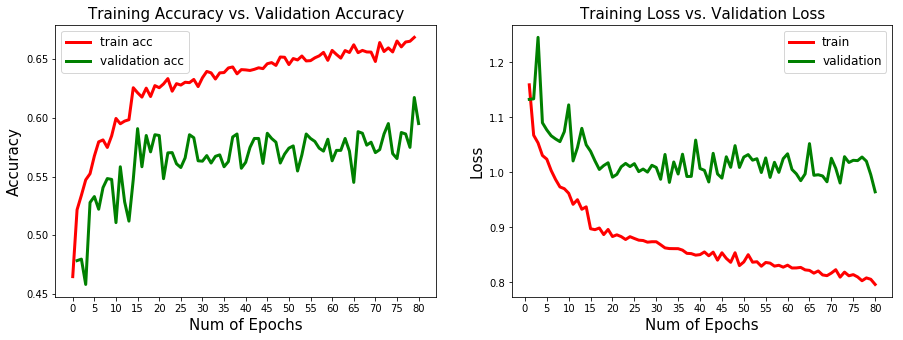

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 5))
  
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(np.arange(0, len(history.history['acc'])), acc, 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_acc'])+1), val_acc, 'g', linewidth=3)
plt.xticks(np.arange(0, 80+1, 5))
plt.title('Training Accuracy vs. Validation Accuracy', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(['train acc', 'validation acc', 'train loss', 'validation loss'], loc='best', fontsize='large')
  
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], 'r', linewidth=3)
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], 'g', linewidth=3)
plt.xticks(np.arange(0, 80+1, 5))
plt.title('Training Loss vs. Validation Loss', fontsize = 15)
plt.xlabel('Num of Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(['train', 'validation'], loc='best', fontsize='large')
  
plt.show()

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(len(acc)):
    acc[i] = '{:.4}'.format(acc[i])
    val_acc[i] = '{:.4}'.format(val_acc[i])
    loss[i] = '{:.4}'.format(loss[i])
    val_loss[i] = '{:.4}'.format(val_loss[i])
    
d = {'acc': acc, 'val_acc': val_acc, 
     'loss': loss, 'val_loss': val_loss}
df = pd.DataFrame(data=d)
print(df)

       acc val_acc    loss val_loss
0   0.4648  0.4784   1.159    1.133
1   0.5217  0.4797   1.068    1.134
2   0.5341  0.4581   1.054    1.246
3   0.5472  0.5279   1.031     1.09
4   0.5525   0.533   1.024    1.077
5   0.5675  0.5222   1.003    1.067
6   0.5796  0.5406  0.9872    1.061
7   0.5813  0.5483  0.9736    1.056
8   0.5748  0.5476  0.9704    1.074
9   0.5847  0.5108  0.9621    1.123
10  0.5995  0.5584   0.942    1.021
11   0.595  0.5286  0.9504    1.045
12  0.5973  0.5121   0.933     1.08
13  0.5985  0.5476  0.9374     1.05
14  0.6257  0.5909  0.8976    1.038
15  0.6214  0.5584  0.8959    1.021
16  0.6177   0.585  0.8989    1.005
17  0.6254  0.5711  0.8869    1.013
18  0.6182  0.5857  0.8963    1.018
19  0.6275   0.585  0.8834   0.9914
20  0.6257  0.5482  0.8865   0.9965
21  0.6289  0.5702  0.8833     1.01
22  0.6335  0.5704   0.878    1.016
23  0.6227  0.5609  0.8831    1.011
24  0.6292  0.5577  0.8799    1.016
25   0.628   0.566  0.8768    1.002
26  0.6304  0.5857  0.8761  

In [19]:
y_img_batch, y_class_batch = test_generator[0] 

for i in range(1,len(test_generator)):
    testX = test_generator[i][0]
    testY = test_generator[i][1]
    y_img_batch = np.concatenate((y_img_batch, testX))
    y_class_batch = np.concatenate((y_class_batch, testY))

y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)

Incorrect Predictions: 


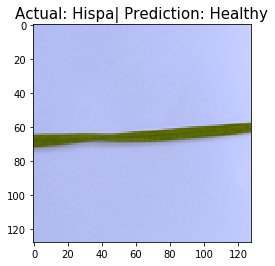

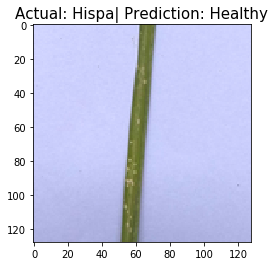

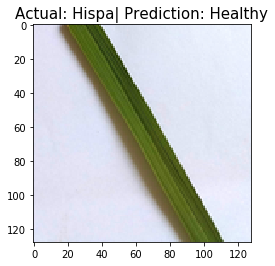

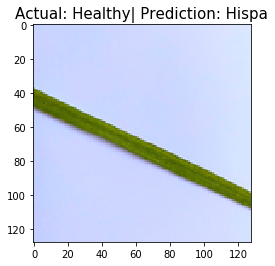

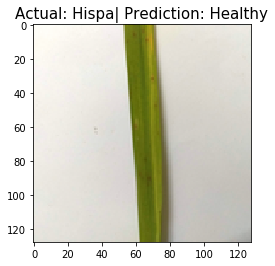

Correct Predictions: 


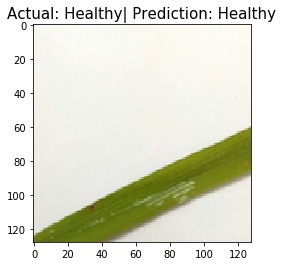

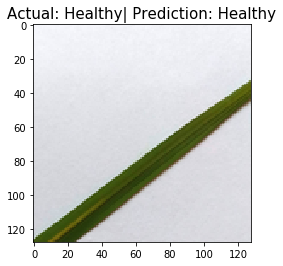

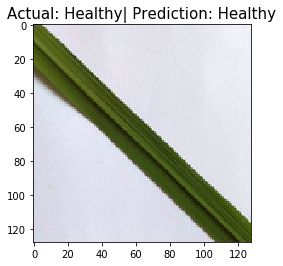

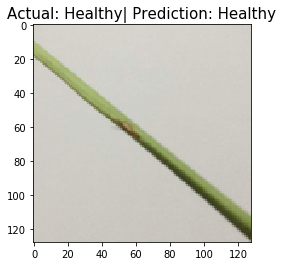

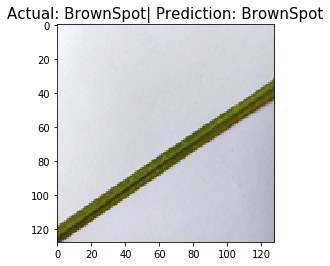

In [20]:
counterC = 0
counterI = 0
i = 0
print('Incorrect Predictions: ')
while counterI < 5:
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    if (actual_label != predict_label):
        plt.imshow((X_test[i]))
        plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
        plt.show()
        counterI+=1
        i+=1
    else:
        i+=1
     
print('Correct Predictions: ')
while counterC < 5:
    actual_label = class_label[y_true[i]]
    predict_label = class_label[y_pred[i]]
    if (actual_label == predict_label):
        plt.imshow((X_test[i]))
        plt.title("Actual: " + actual_label + "| Prediction: " + predict_label, fontsize = 15)
        plt.show()
        counterC+=1
        i+=1
    else:
        i+=1

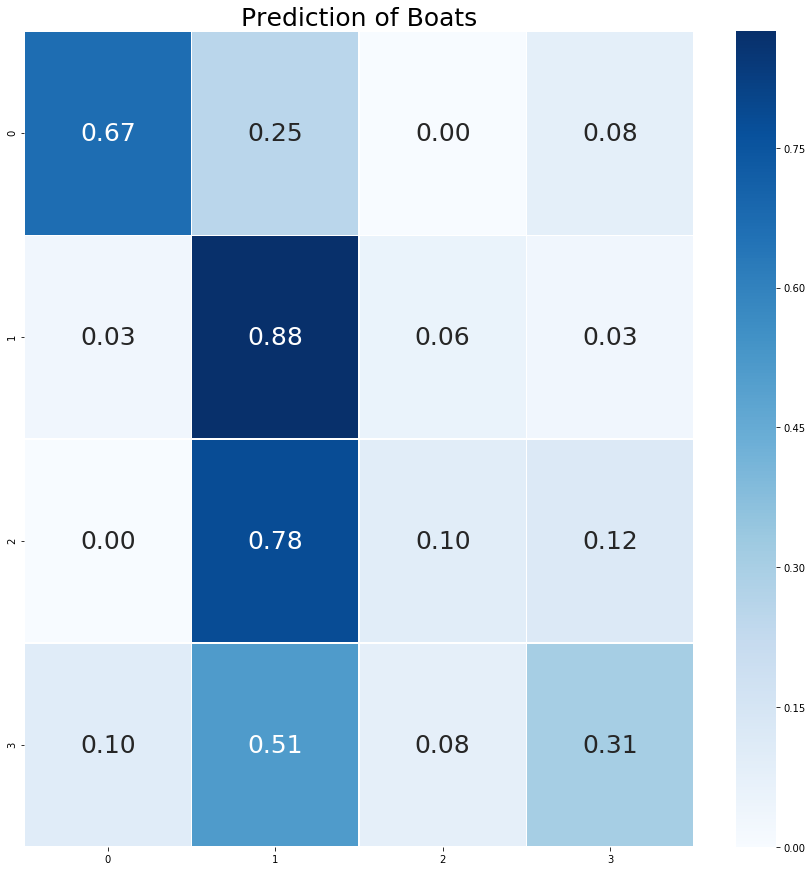

In [21]:
cm = confusion_matrix(y_true, y_pred) 
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,15))
plt.title('Prediction of Boats', fontsize = 25)
sns.heatmap(cmn, annot=True, fmt=".2f", linewidths=.5, cmap="Blues", annot_kws={"size": 25})

In [22]:
print(classification_report(y_true, y_pred, target_names=class_label, digits=4))

              precision    recall  f1-score   support

   BrownSpot     0.6667    0.6667    0.6667        24
     Healthy     0.5500    0.8750    0.6754        88
       Hispa     0.3077    0.0976    0.1481        41
   LeafBlast     0.6000    0.3061    0.4054        49

    accuracy                         0.5545       202
   macro avg     0.5311    0.4863    0.4739       202
weighted avg     0.5268    0.5545    0.5019       202



In [23]:
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

n_classes = len(class_label)
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_true = lb.transform(y_true)
y_pred = lb.transform(y_pred)

lw = 5

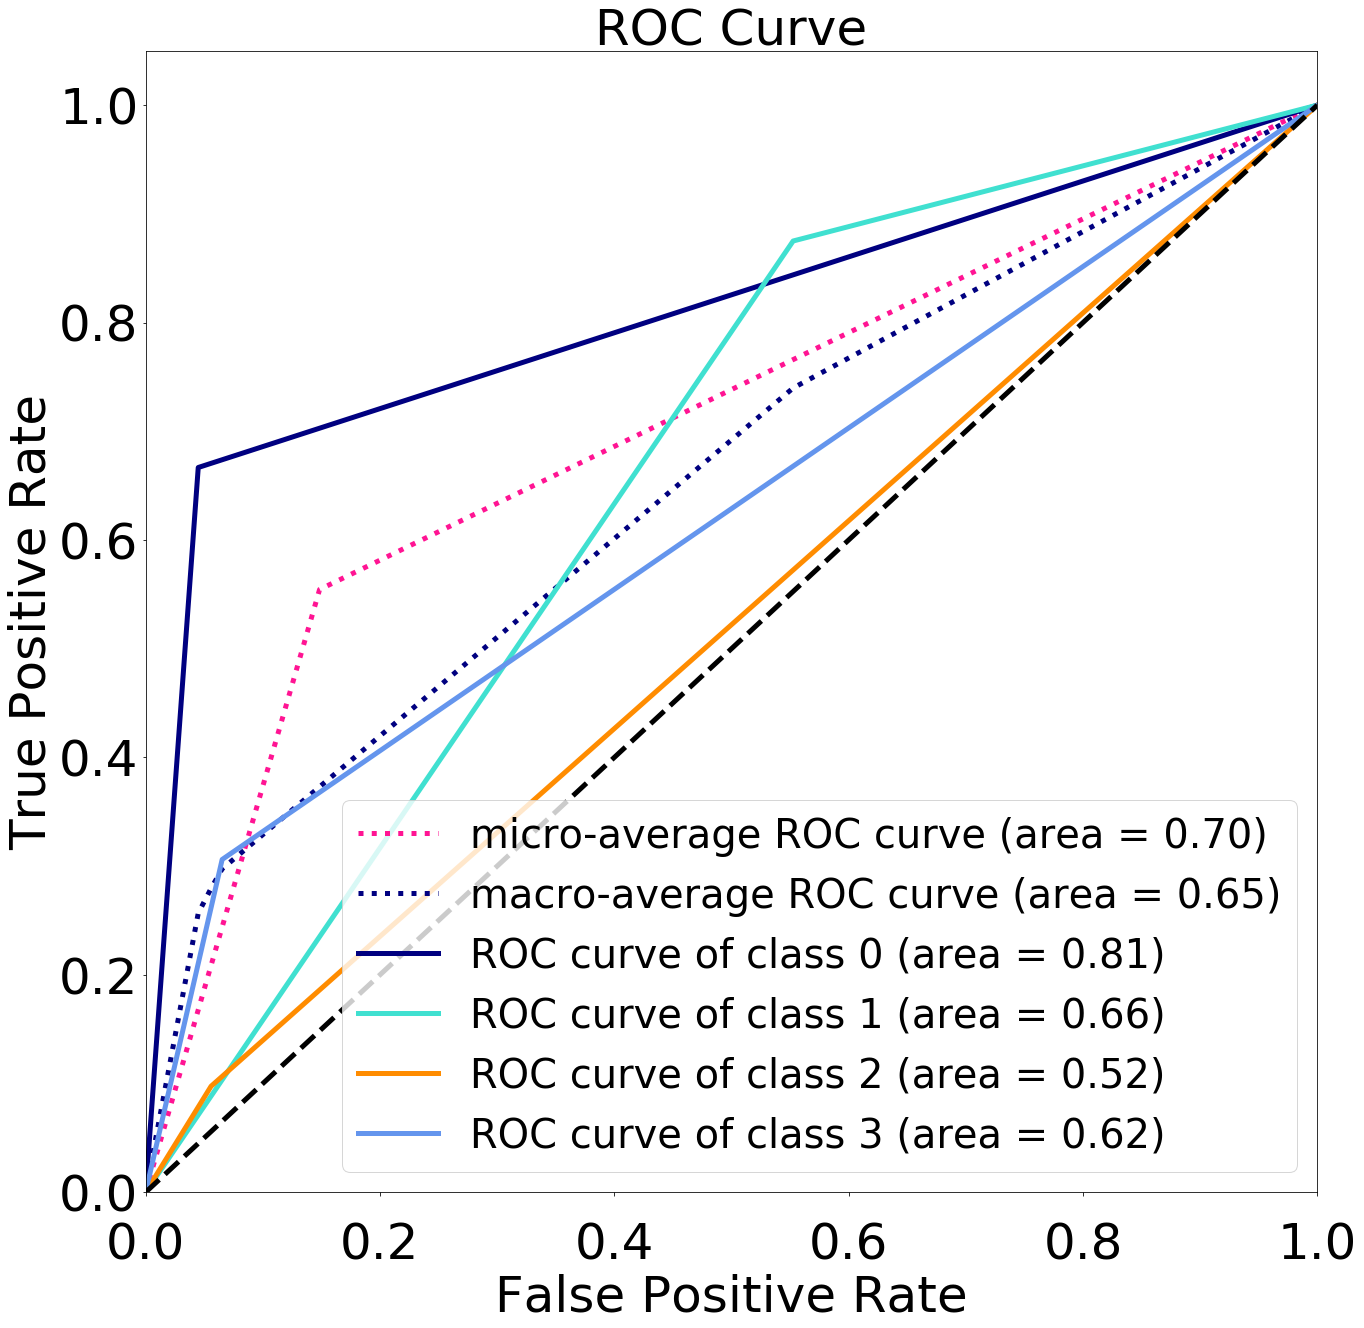

ROC_AUC_Score: 0.6533143242302164


In [24]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
#     # Plot of a ROC curve for a specific class
#     for i in range(n_classes):
#         plt.figure(figsize=(15,15))
#         plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver operating characteristic example')
#         plt.legend(loc="lower right")
#         plt.show()


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(21,21))
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=lw)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=lw)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize= 50)
    plt.yticks(fontsize= 50)
    plt.tick_params(axis='x', pad=25)
    plt.xlabel('False Positive Rate', fontsize = 50)
    plt.ylabel('True Positive Rate', fontsize = 50)
    plt.title('ROC Curve', fontsize = 50)
    plt.legend(loc="lower right",fontsize=40)
    plt.show()
        
    return roc_auc_score(y_test, y_pred, average=average)

print("ROC_AUC_Score:", multiclass_roc_auc_score(y_true, y_pred))

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
    
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.4f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.4188


Text(0.5,1,'Average precision score, micro-averaged over all classes: AP=0.4188')

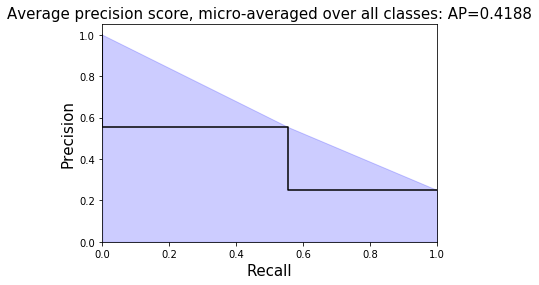

In [26]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='black', alpha=1.0,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='blue')#,
                 #**step_kwargs)

plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.4f}'
    .format(average_precision["micro"]), fontsize = 15)

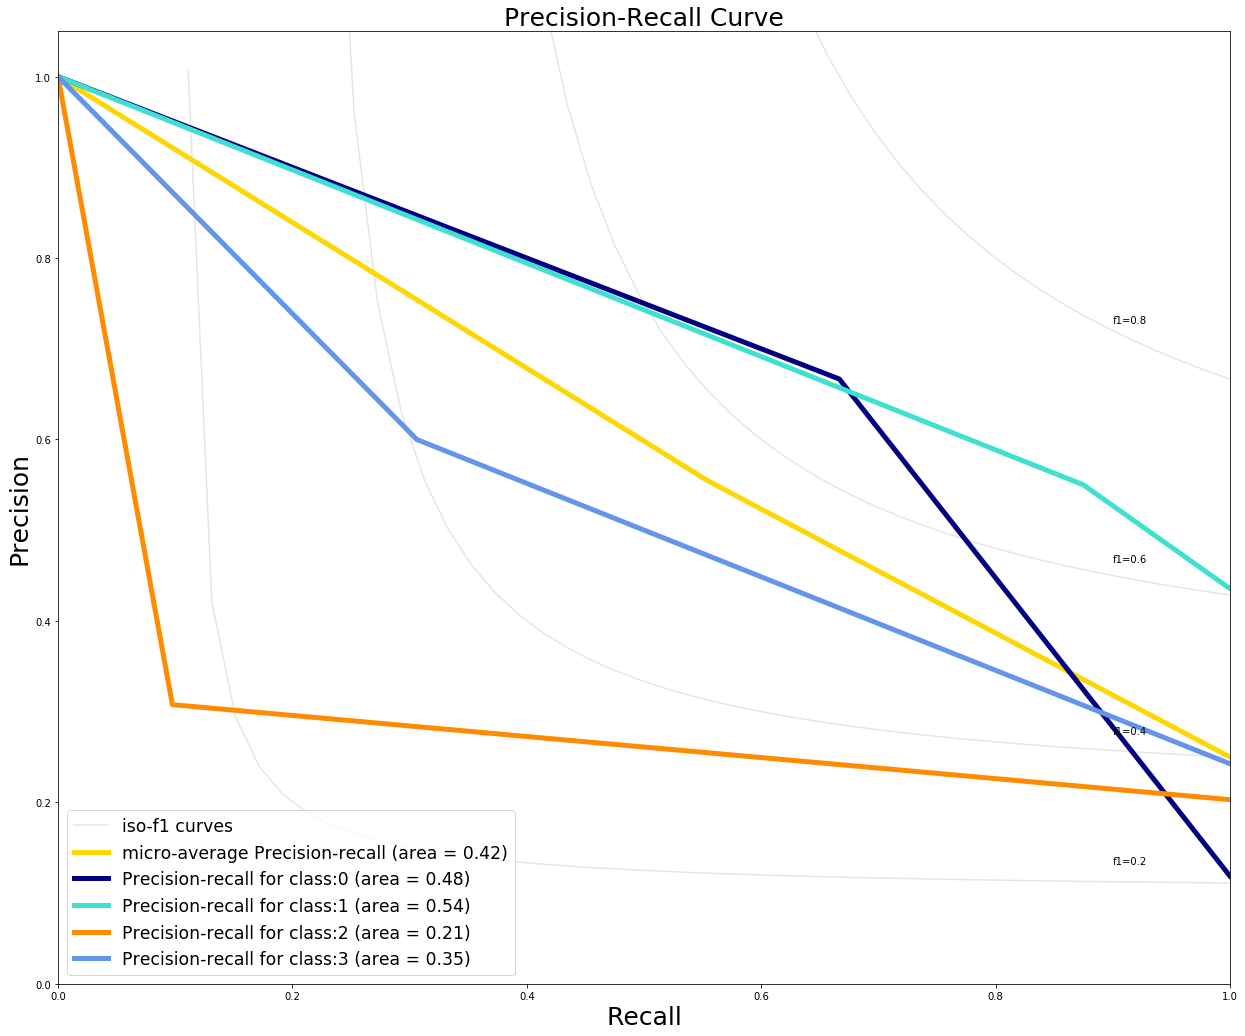

In [27]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'brown', 'purple'])

plt.figure(figsize=(21, 21))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=lw)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize = 25)
plt.ylabel('Precision', fontsize = 25)
plt.title('Precision-Recall Curve', fontsize = 25)
plt.legend(lines, labels, loc='lower left', fontsize='xx-large')


plt.show()